# DMA 

### Laminato quasi simmetrico 11 strati + 1(rc 200)


| spessore | ply    | tipo           | oientamento |
|----------|--------|----------------|-------------|
| 0.26     | RC-200 | Tessuto (fine) | 0/90        |
| 0.49     | RC-400 | Tessuto        | 0/90        |
| 0.47     | XC-400 | c-ply          | -45/+45     |
| 0.33     | UC-300 | unidirezionale | 0           |
| 0.33     | UC-300 | uni            | 0           |
| 0.33     | UC-300 | uni            | 0           |
| 0.49     | RC-400 | Tessuto        | 0/90        |
| 0.33     | UC-300 | uni            | 0           |
| 0.33     | UC-300 | uni            | 0           |
| 0.33     | UC-300 | uni            | 0           |
| 0.47     | XC-400 | C-ply          | -45/45      |
| 0.49     | RC-400 | Tessuto        | 0/90        |

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from Modulo_DMA import estrai,plottaggio,media_smoramento
from Composito import get_laminate,Q_ply,get_engineering_constants,get_compliance

f_min = 0
f_max = 100

# Variabili ausiliarie => nome file
name = []
name_2N = []
name_meta = []
name_2N_meta = []

for i in range(1,6):
    name.append(f"CFRP_f1_100_5_1N_{i}")
    name.append(f"CFRP_f1_100_5_1N_dietro_{i}")
    name_2N.append(f"CFRP_f1_100_5_2N_{i}")
    name_2N.append(f"CFRP_f1_100_5_2N_dietro_{i}")
    name_2N_meta.append(f"CFRP_f1_100_5_2N_{i}")
    name_meta.append(f"CFRP_f1_100_5_1N_{i}")

rc_200 = {'s':0.26,'Ex':53522,'Ey':53522,'v':0.03,'G':2929,'fabric':True,'theta':0,'meta':['rc_200','tessuto (fine)']}
rc_400 = {'s':0.49,'Ex':53522,'Ey':53522,'v':0.03,'G':2929,'fabric':True,'theta':0,'meta':['rc_400','tessuto']}
xc_400 = {'s':0.47,'Ex':57770,'Ey':57770,'v':0.03,'G':3186,'fabric':True,'theta':45,'meta':['xc_400','c-ply (-45/+45)']}
uc_300 = {'s':0.33,'Ex':118454,'Ey':7104,'v':0.29,'G':3531,'fabric':False,'theta':0,'meta':['uc_300','unidirezionale']}


spessore nominale

In [3]:
laminato = [rc_200,rc_400,xc_400,uc_300,uc_300,uc_300,rc_400,uc_300,uc_300,uc_300,xc_400,rc_400]
s = 0
for lamina in laminato: # definisco lo Spessore
    print(lamina['meta'])
    s += lamina['s']
print(s)

['rc_200', 'tessuto (fine)']
['rc_400', 'tessuto']
['xc_400', 'c-ply (-45/+45)']
['uc_300', 'unidirezionale']
['uc_300', 'unidirezionale']
['uc_300', 'unidirezionale']
['rc_400', 'tessuto']
['uc_300', 'unidirezionale']
['uc_300', 'unidirezionale']
['uc_300', 'unidirezionale']
['xc_400', 'c-ply (-45/+45)']
['rc_400', 'tessuto']
4.65


# Provino A

** Confonto prove provino 1A del 22/3 e quelle di febbraio


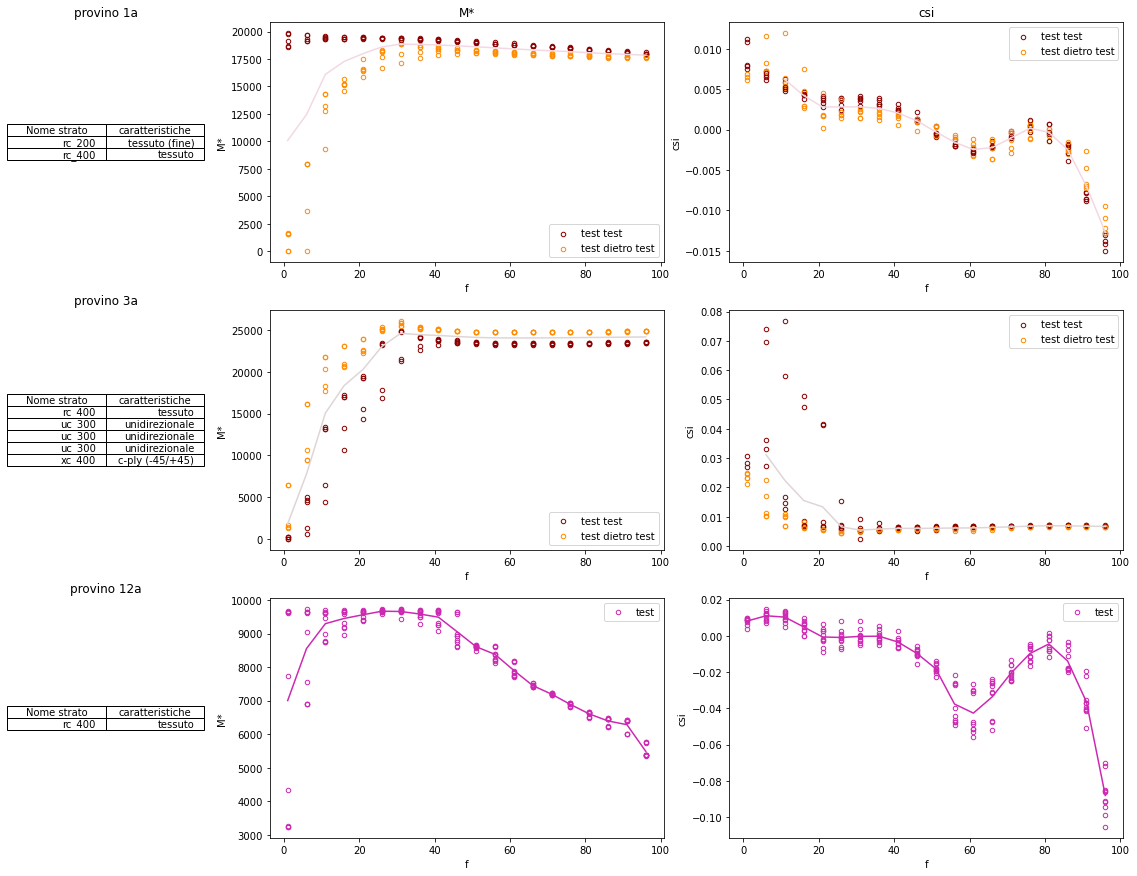

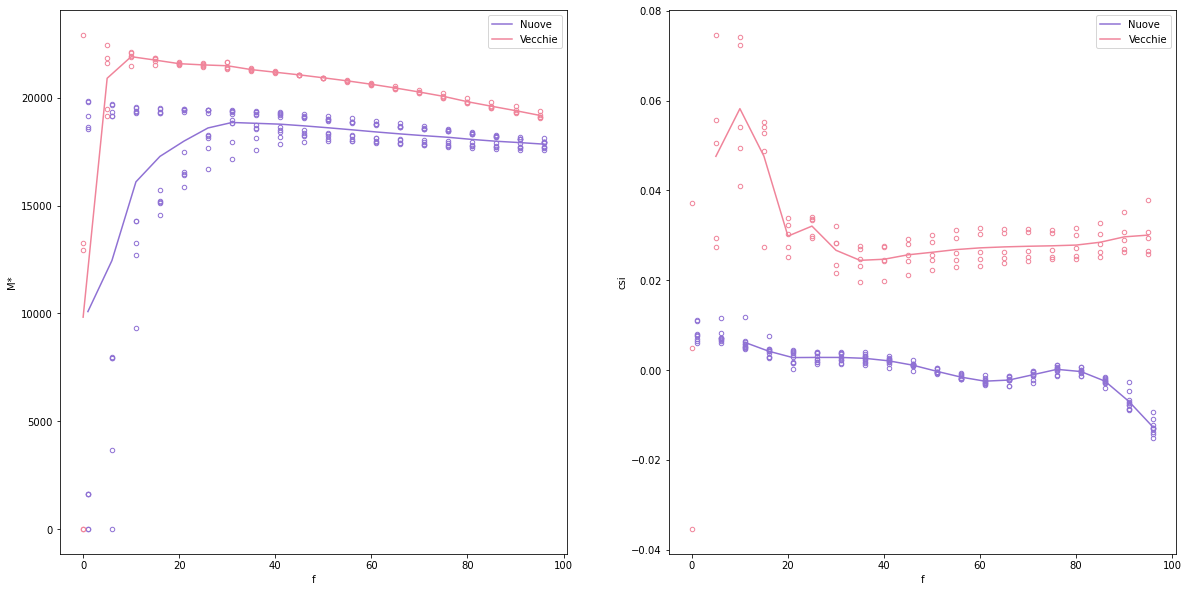

In [46]:
path_base = r'dma/provino 1a/'
data_provino_1a = estrai(path_base,1,name=name)
laminato_provino_1a = {'name':'provino 1a','s':0.95,'struttura':[rc_200,rc_400]}
path_base = r'dma/provino 3a/'
data_provino_3a = estrai(path_base,1,name=name)
laminato_provino_3a =  {'name':'provino 3a','s':2.25,'struttura':[rc_400,uc_300,uc_300,uc_300,xc_400]}
path_base = r'dma/provino 12a/'
data_provino_12a = estrai(path_base,1,name=name)
laminato_provino_12a = {'name':'provino 12a','s':0.69,'struttura':[rc_400]}
#
#
widths = [1, 2, 2]
gs_kw = dict(width_ratios=widths)

fig,ax = plt.subplots(3,3,figsize=(20,3*5),gridspec_kw=gs_kw)
columns = ('Nome strato','caratteristiche')

ax[0][0].table(cellText=[ply['meta'] for ply in laminato_provino_1a['struttura']],colLabels=columns,loc='center')
ax[0][0].axis('off')
ax[0][0].set_title('provino 1a')
plottaggio(data_provino_1a,ax[0][1],ax[0][2],f_min = f_min,flag_colore = 2,flag_title = True)
(_,_,D,s) = get_laminate(laminato_provino_1a['struttura'])
#ax[0][1].hlines(D[0,0]*(12/(s**3)),f_min,f_max)


ax[1][0].table(cellText=[ply['meta'] for ply in laminato_provino_3a['struttura']],colLabels=columns,loc='center')
ax[1][0].axis('off')
ax[1][0].set_title(laminato_provino_3a['name'])
plottaggio(data_provino_3a,ax[1][1],ax[1][2],f_min = f_min,flag_colore = 2)

ax[2][0].table(cellText=[ply['meta'] for ply in laminato_provino_12a['struttura']],colLabels=columns,loc='center')
ax[2][0].axis('off')
ax[2][0].set_title('provino 12a')
plottaggio(data_provino_12a,ax[2][1],ax[2][2],f_min = f_min,flag_colore = 1)

print('** Confonto prove provino 1A del 22/3 e quelle di febbraio')
path_base = r'dma/provino 1a vecchie/'
data_provino_1a_old = estrai(path_base,1,name=name_meta)
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(20,10))
plottaggio(data_provino_1a,ax1,ax2,f_min = f_min,flag_colore = 1)
plottaggio(data_provino_1a_old,ax1,ax2,f_min = f_min,flag_colore = 1)
ax1.legend(['Nuove','Vecchie'])
ax2.legend(['Nuove','Vecchie'])
plt.show()


## Provino B

In [47]:

#
path_base = r'dma/provino 1b/'
data_provino_1b = estrai(path_base,1,name=name_meta)
data_provino_1b_2N = estrai(path_base,1,name=name_2N)

laminato_provino_1b = {'name':'provino 1b','s':2.42,'struttura':[rc_200,rc_400,xc_400,uc_300]}
path_base = r'dma/provino 1-2b/'
name_temp = []
name_temp = name_meta[:]
name_temp.remove('CFRP_f1_100_5_1N_1')
name_temp.remove('CFRP_f1_100_5_1N_5')
data_provino_1_2b = estrai(path_base,1,name=name_temp)
laminato_provino_1_2b = {'name':'provino 1/2b','s':2.12,'struttura':[uc_300]}
path_base = r'dma/provino 3b/'
data_provino_3b = estrai(path_base,1,name=name)
laminato_provino_3b = {'name':'provino 3b','s':0.66,'struttura':[rc_400]}
path_base = r'dma/provino 4b/'
data_provino_4b = estrai(path_base,1,name=name_meta)
laminato_provino_4b = {'name':'provino 4b','s':2.30,'struttura':[uc_300,uc_300,uc_300,xc_400]}
path_base = r'dma/provino 4b  vecchie/'
data_provino_4b_old = estrai(path_base,1,name=name_2N_meta)
path_base = r'dma/provino 5b/'
data_provino_5b = estrai(path_base,1,name=name)
laminato_provino_5b = {'name':'provino 5b','s':0.68,'struttura':[rc_400]}
## ---------------------------------------------------------------------
fig,ax = plt.subplots(5,3,figsize=(20,4*10),gridspec_kw=gs_kw)

ax[0][0].table(cellText=[ply['meta'] for ply in laminato_provino_1b['struttura']],colLabels=columns,loc='center')
ax[0][0].axis('off')
ax[0][0].set_title('provino 1b')
plottaggio(data_provino_1b,ax[0][1],ax[0][2],f_min = f_min,flag_colore = 2,flag_title = True)
print(f'{laminato_provino_1b['name']} con spessore s = {laminato_provino_1b['s']}')

ax[1][0].table(cellText=[ply['meta'] for ply in laminato_provino_1_2b['struttura']],colLabels=columns,loc='center')
ax[1][0].axis('off')
ax[1][0].set_title('provino 1/2b')
plottaggio(data_provino_1_2b,ax[1][1],ax[1][2],f_min = f_min,flag_colore = 1)

ax[2][0].table(cellText=[ply['meta'] for ply in laminato_provino_3b['struttura']],colLabels=columns,loc='center')
ax[2][0].axis('off')
ax[2][0].set_title('provino 3b')
plottaggio(data_provino_3b,ax[2][1],ax[2][2],f_min = f_min,flag_colore = 1)


ax[3][0].table(cellText=[ply['meta'] for ply in laminato_provino_4b['struttura']],colLabels=columns,loc='center')
ax[3][0].axis('off')
ax[3][0].set_title('provino 4b vecchie')
plottaggio(data_provino_4b_old,ax[3][1],ax[3][2],f_min = f_min,flag_colore = 1)
y_lim = 0.1*10**6
ax[3][1].set_ylim([0,y_lim])

ax[4][0].table(cellText=[ply['meta'] for ply in laminato_provino_5b['struttura']],colLabels=columns,loc='center')
ax[4][0].axis('off')
ax[4][0].set_title('provino 5b')
plottaggio(data_provino_5b,ax[4][1],ax[4][2],f_min = f_min,flag_colore = 1)
y_lim = 0.8*10**8
ax[4][1].set_ylim([0,y_lim])

plt.show()

print("*Confronto 3b vecchio e nuovo")
fig,ax = plt.subplots(1,2,figsize=(20,10))
plottaggio(data_provino_4b,ax[0],ax[1],f_min = f_min,flag_colore = 1)
plottaggio(data_provino_4b_old,ax[0],ax[1],f_min = f_min,flag_colore = 1)
ax[0].legend(['provino 4b','provino 4b vecchie'])
plt.show()

SyntaxError: invalid syntax (<ipython-input-47-84e313abd884>, line 32)

# Provino C

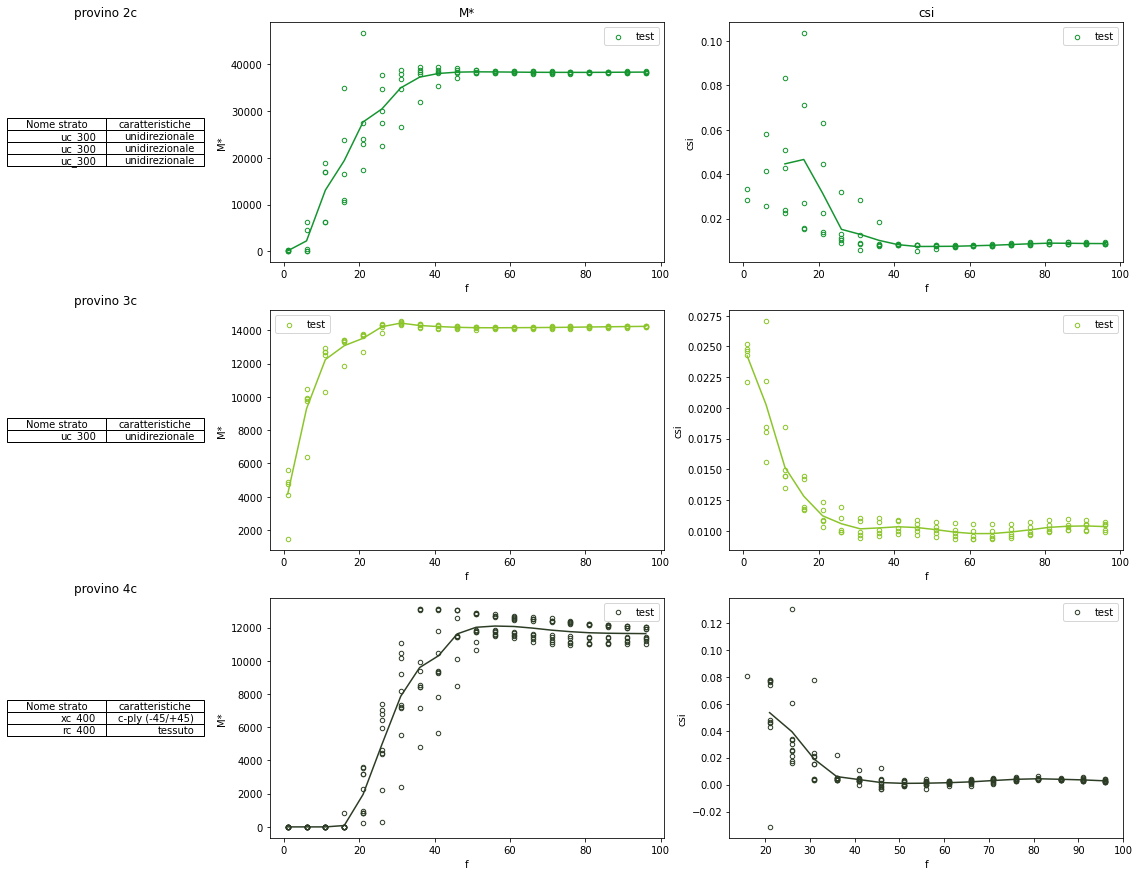

In [29]:
path_base = r'dma/provino 2c/'
data_provino_2c = estrai(path_base,1,name=name_meta)
laminato_provino_2c = {'name':'provino 2c','s':1.53,'struttura':[uc_300,uc_300,uc_300]}

path_base = r'dma/provino 3c/'
data_provino_3c = estrai(path_base,1,name=name_meta)
laminato_provino_3c = {'name':'provino 3c','s':1.78,'struttura':[uc_300]}

path_base = r'dma/provino 4c/'
data_provino_4c = estrai(path_base,1,name=name)
laminato_provino_4c = {'name':'provino 4c','s':0.94,'struttura':[xc_400,rc_400]}
## ---------------------------------------------------------------------
fig,ax = plt.subplots(3,3,figsize=(20,3*5),gridspec_kw=gs_kw)

ax[0][0].table(cellText=[ply['meta'] for ply in laminato_provino_2c['struttura']],colLabels=columns,loc='center')
ax[0][0].axis('off')
ax[0][0].set_title('provino 2c')

plottaggio(data_provino_2c,ax[0][1],ax[0][2],f_min = f_min,flag_colore = 1,flag_title = True)

ax[1][0].table(cellText=[ply['meta'] for ply in laminato_provino_3c['struttura']],colLabels=columns,loc='center')
ax[1][0].axis('off')
ax[1][0].set_title('provino 3c')

plottaggio(data_provino_3c,ax[1][1],ax[1][2],f_min = f_min,flag_colore = 1)


ax[2][0].table(cellText=[ply['meta'] for ply in laminato_provino_4c['struttura']],colLabels=columns,loc='center')
ax[2][0].axis('off')
ax[2][0].set_title('provino 4c')
plottaggio(data_provino_4c,ax[2][1],ax[2][2],f_min = f_min,flag_colore = 1)
plt.show()

# Combinato

## Fibre (uc 300)

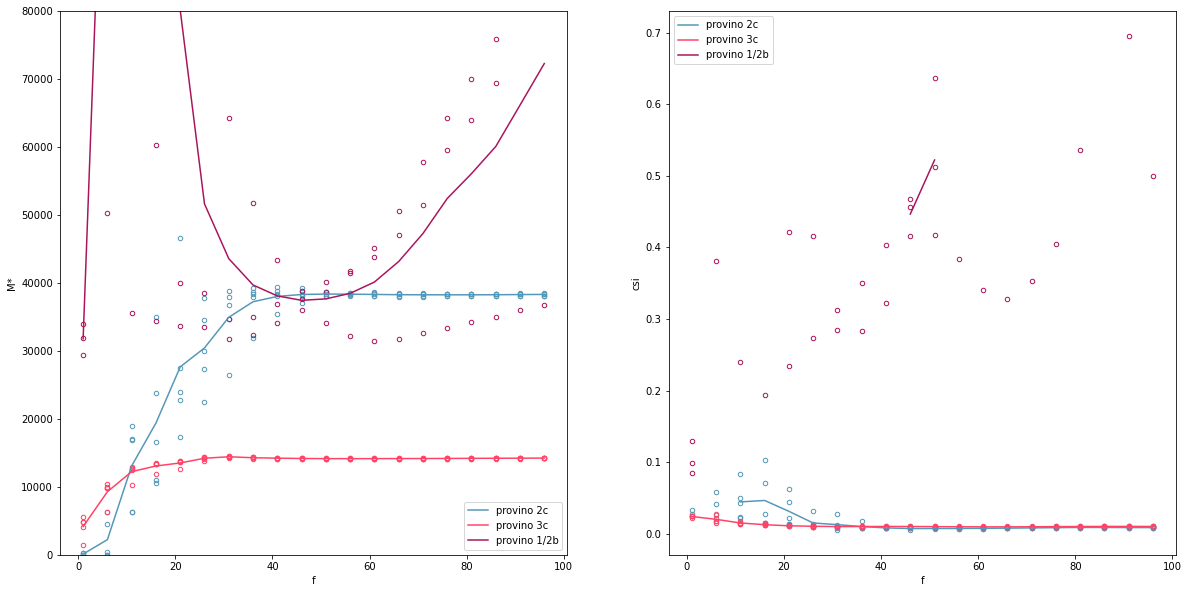

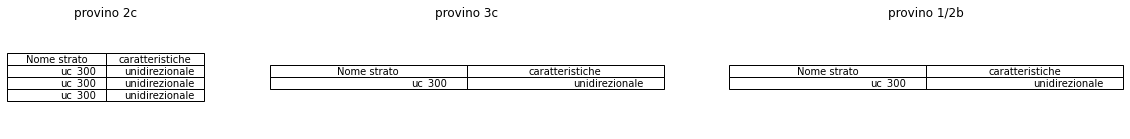

In [35]:
fig,ax = plt.subplots(1,2,figsize=(20,10))

plottaggio(data_provino_2c,ax[0],ax[1],f_min = f_min,flag_colore = 1)
plottaggio(data_provino_3c,ax[0],ax[1],f_min = f_min,flag_colore = 1)
plottaggio(data_provino_1_2b,ax[0],ax[1],f_min = f_min,flag_colore = 1)
ax[1].legend(['provino 2c','provino 3c','provino 1/2b'])
ax[0].legend(['provino 2c','provino 3c','provino 1/2b'])
ax[0].set_ylim([0,80000])
plt.show()

fig,ax = plt.subplots(1,3,figsize=(20,2),gridspec_kw=gs_kw)
columns = ('Nome strato','caratteristiche')
ax[0].table(cellText=[ply['meta'] for ply in laminato_provino_2c['struttura']],colLabels=columns,loc='center')
ax[0].axis('off')
ax[0].set_title('provino 2c')
ax[1].table(cellText=[ply['meta'] for ply in laminato_provino_3c['struttura']],colLabels=columns,loc='center')
ax[1].axis('off')
ax[1].set_title('provino 3c')
ax[2].table(cellText=[ply['meta'] for ply in laminato_provino_1_2b['struttura']],colLabels=columns,loc='center')
ax[2].axis('off')
ax[2].set_title('provino 1/2b')
plt.show()


## Tessuto RC 400

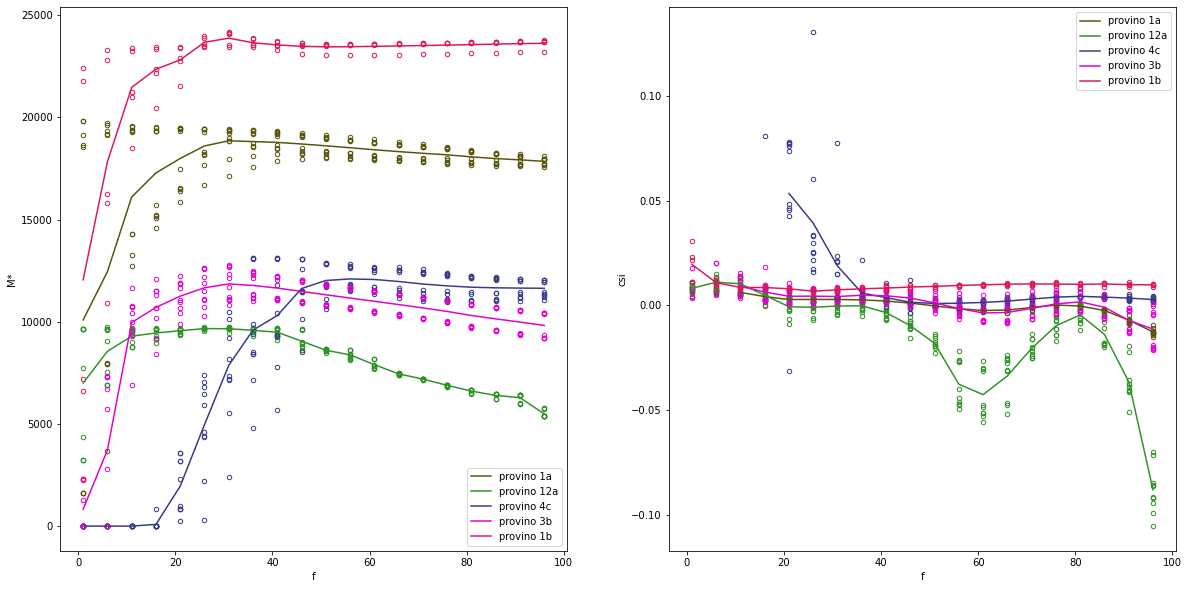

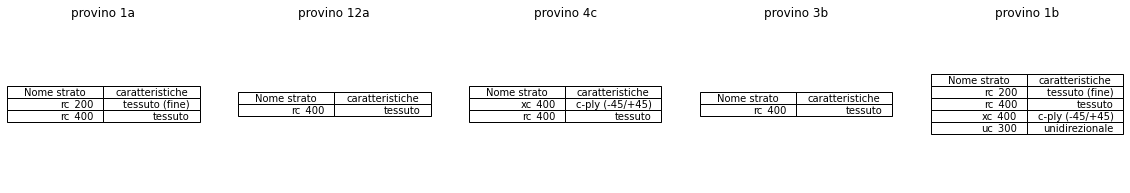

In [31]:
fig,ax = plt.subplots(1,2,figsize=(20,10))
plottaggio(data_provino_1a,ax[0],ax[1],f_min = f_min,flag_colore = 1)
# plottaggio(data_provino_1a_old,ax[0],ax[1],f_min = f_min,flag_colore = 1)
plottaggio(data_provino_12a,ax[0],ax[1],f_min = f_min,flag_colore = 1)
plottaggio(data_provino_4c,ax[0],ax[1],f_min = f_min,flag_colore = 1)
plottaggio(data_provino_3b,ax[0],ax[1],f_min = f_min,flag_colore = 1)
plottaggio(data_provino_1b,ax[0],ax[1],f_min = f_min,flag_colore = 1)

ax[1].legend(['provino 1a','provino 12a','provino 4c','provino 3b','provino 1b'])
ax[0].legend(['provino 1a','provino 12a','provino 4c','provino 3b','provino 1b'])
plt.show()

fig,ax = plt.subplots(1,5,figsize=(20,3))
ax[0].table(cellText=[ply['meta'] for ply in laminato_provino_1a['struttura']],colLabels=columns,loc='center')
ax[0].axis('off')
ax[0].set_title('provino 1a')
ax[1].table(cellText=[ply['meta'] for ply in laminato_provino_12a['struttura']],colLabels=columns,loc='center')
ax[1].axis('off')
ax[1].set_title('provino 12a')
ax[2].table(cellText=[ply['meta'] for ply in laminato_provino_4c['struttura']],colLabels=columns,loc='center')
ax[2].axis('off')
ax[2].set_title('provino 4c')
ax[3].table(cellText=[ply['meta'] for ply in laminato_provino_3b['struttura']],colLabels=columns,loc='center')
ax[3].axis('off')
ax[3].set_title('provino 3b')
ax[4].table(cellText=[ply['meta'] for ply in laminato_provino_1b['struttura']],colLabels=columns,loc='center')
ax[4].axis('off')
ax[4].set_title('provino 1b')
plt.show()


# Insieme

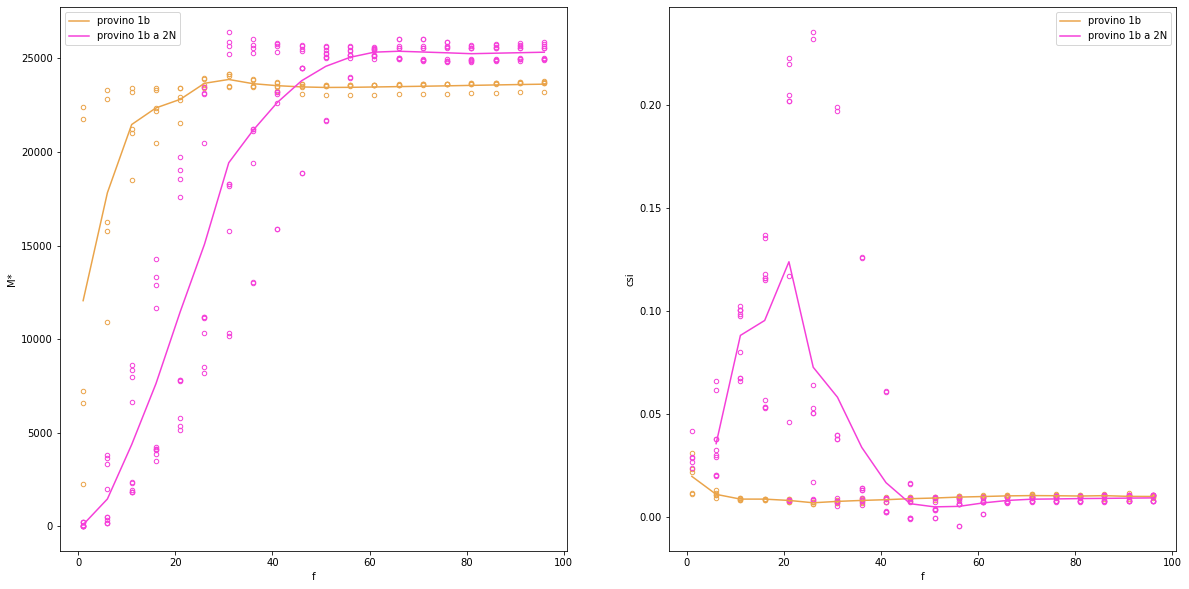

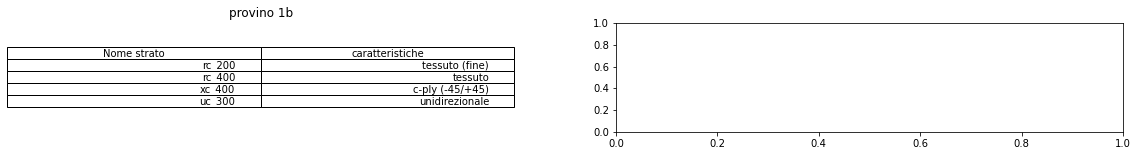

In [32]:
fig,ax = plt.subplots(1,2,figsize=(20,10))
plottaggio(data_provino_1b,ax[0],ax[1],f_min = f_min,flag_colore = 1)
plottaggio(data_provino_1b_2N,ax[0],ax[1],f_min = f_min,flag_colore = 1)

ax[1].legend(['provino 1b','provino 1b a 2N'])
ax[0].legend(['provino 1b','provino 1b a 2N'])
plt.show()

fig,ax = plt.subplots(1,2,figsize=(20,2))

ax[0].table(cellText=[ply['meta'] for ply in laminato_provino_1b['struttura']],colLabels=columns,loc='center')
ax[0].axis('off')
ax[0].set_title('provino 1b')

plt.show()


{'valori': (0.00911414822416542, 23522.96875), 'name': 'provino 1b'}
{'valori': (0.01051943116052365, 36852.08), 'name': 'provino 2c'}
{'valori': (3.1122988143031556e-06, 10964.148125), 'name': 'provino 2c'}
{'valori': (0.006818194844401905, 23872.815625), 'name': 'provino 3a'}
{'valori': (-0.02001937712834686, 8011.5906875), 'name': 'provino 12a'}


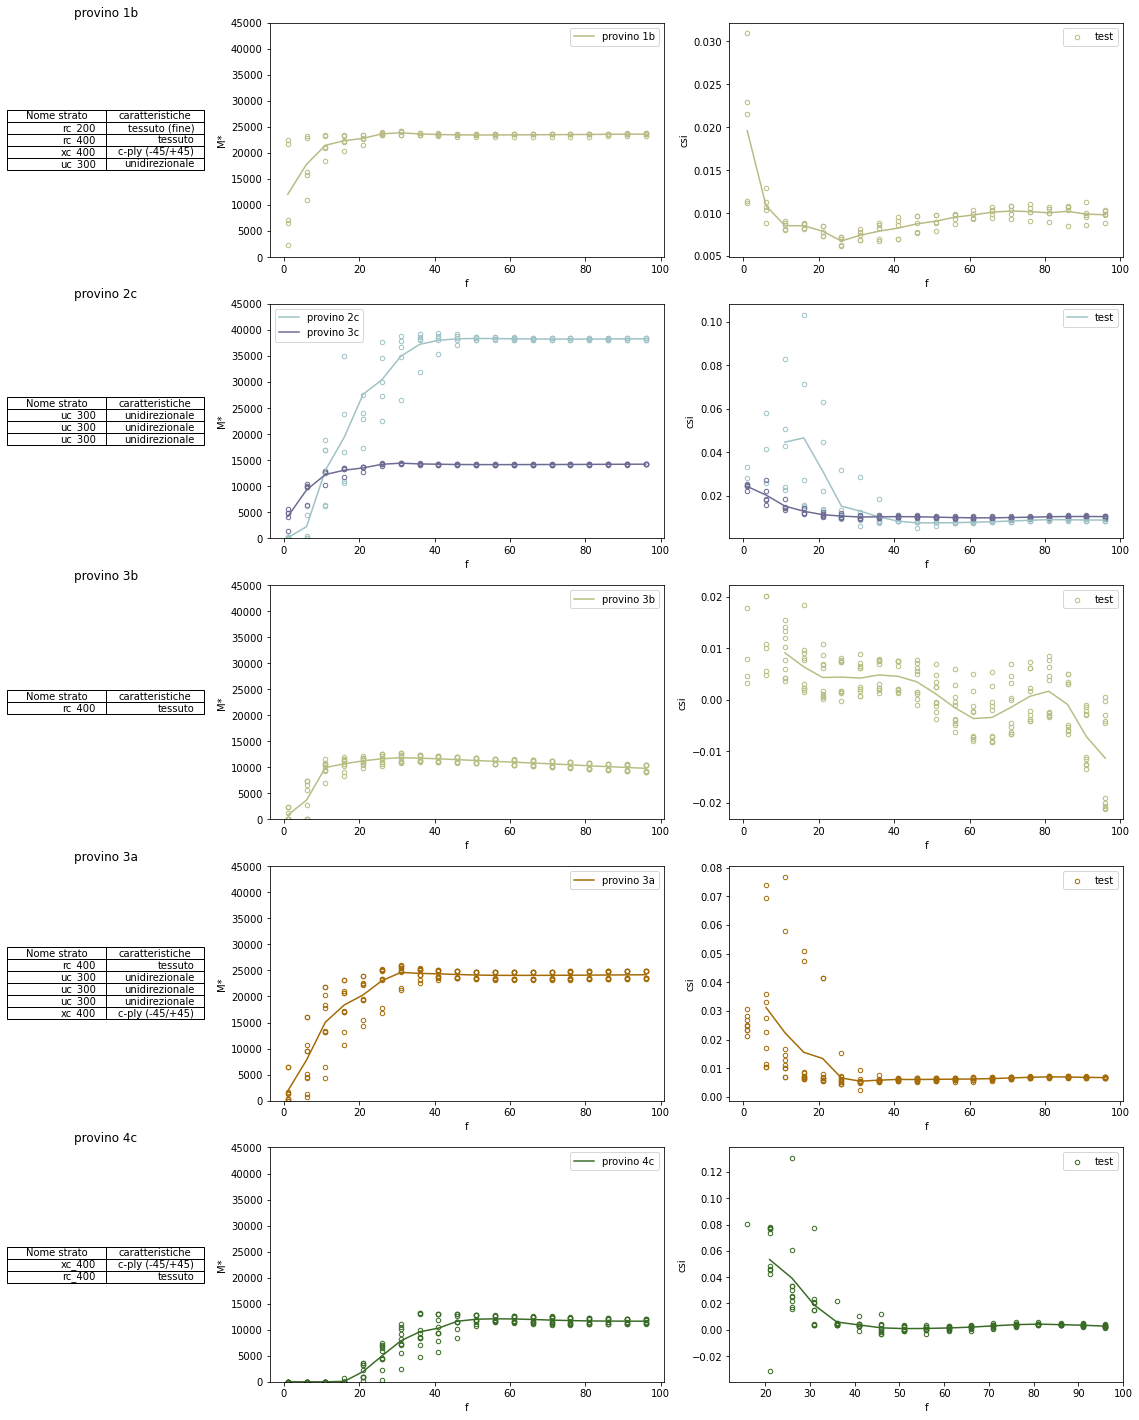

In [34]:
fig,ax = plt.subplots(5,3,figsize=(20,5*5),gridspec_kw=gs_kw)
y_lim = 45000
f_lim = 20
data = []

ax[0][0].table(cellText=[ply['meta'] for ply in laminato_provino_1b['struttura']],colLabels=columns,loc='center')
ax[0][0].axis('off')
ax[0][0].set_title('provino 1b')
#plottaggio(data_provino_1a,ax[0][1],ax[0][2],f_min = f_min,flag_colore = 1)
plottaggio(data_provino_1b,ax[0][1],ax[0][2],f_min = f_min,flag_colore = 1)
ax[0][1].legend(['provino 1b'])
ax[0][1].set_ylim([0,y_lim])
data.append({'valori':media_smoramento(data_provino_1b,f_lim),'name':'provino 1b'})
print(data[-1])

ax[1][0].table(cellText=[ply['meta'] for ply in laminato_provino_2c['struttura']],colLabels=columns,loc='center')
ax[1][0].axis('off')
ax[1][0].set_title('provino 2c')
plottaggio(data_provino_2c,ax[1][1],ax[1][2],f_min = f_min,flag_colore = 1)
plottaggio(data_provino_3c,ax[1][1],ax[1][2],f_min = f_min,flag_colore = 1)
ax[1][1].legend(['provino 2c','provino 3c'])
ax[1][1].set_ylim([0,y_lim])
data.append({'valori':media_smoramento(data_provino_2c,f_lim),'name':'provino 2c'})
print(data[-1])

ax[2][0].table(cellText=[ply['meta'] for ply in laminato_provino_3b['struttura']],colLabels=columns,loc='center')
ax[2][0].axis('off')
ax[2][0].set_title('provino 3b')
plottaggio(data_provino_3b,ax[2][1],ax[2][2],f_min = f_min,flag_colore = 1)
ax[2][1].legend(['provino 3b'])
ax[2][1].set_ylim([0,y_lim])
data.append({'valori':media_smoramento(data_provino_3b,f_lim),'name':'provino 2c'})
print(data[-1])

ax[3][0].table(cellText=[ply['meta'] for ply in laminato_provino_3a['struttura']],colLabels=columns,loc='center')
ax[3][0].axis('off')
ax[3][0].set_title('provino 3a')
plottaggio(data_provino_3a,ax[3][1],ax[3][2],f_min = f_min,flag_colore = 1)
ax[3][1].legend(['provino 3a'])
ax[3][1].set_ylim([0,y_lim])
y_lim = 45000
data.append({'valori':media_smoramento(data_provino_3a,f_lim),'name':'provino 3a'})
print(data[-1])

ax[4][0].table(cellText=[ply['meta'] for ply in laminato_provino_4c['struttura']],colLabels=columns,loc='center')
ax[4][0].axis('off')
ax[4][0].set_title('provino 4c')
#plottaggio(data_provino_12a,ax[4][1],ax[4][2],f_min = f_min,flag_colore = 1)
plottaggio(data_provino_4c,ax[4][1],ax[4][2],f_min = f_min,flag_colore = 1)
ax[4][1].legend(['provino 4c'])
ax[4][1].set_ylim([0,y_lim])
data.append({'valori':media_smoramento(data_provino_12a,f_lim),'name':'provino 12a'})
print(data[-1])

plt.show()
